In [11]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset (assuming you uploaded the CSV to Google Colab)
# If running in Google Colab, use your file path or Google Drive

# Mount Google Drive if using
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Retail Price Optimization Model/retail_price_optimization_large_dataset.csv')

# Show first few rows of the dataset
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Product_ID,Category,Cost_Price,Selling_Price,Historical_Sales,Stock_Available,Discount_Offered,Competitor_Price,Rating,Review_Text
0,1,Beauty,439.24,424.29,8396,146,10%,389.11,4.9,Highly recommended
1,2,Books,122.60,457.10,4956,120,20%,312.34,4.4,Stylish and affordable
2,3,Electronics,253.57,70.07,3448,32,20%,166.36,4.0,Highly recommended
3,4,Grocery,359.65,581.83,4724,42,10%,330.44,4.0,Highly recommended
4,5,Sports,192.86,323.32,8556,21,25%,183.12,4.6,Not up to the mark


In [12]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Discount_Offered' from percentage to numerical values
df['Discount_Offered'] = df['Discount_Offered'].str.rstrip('%').astype('float') / 100.0

# Encode categorical variables ('Category')
df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Prepare features (X) and target (y)
X = df.drop(['Selling_Price', 'Review_Text'], axis=1)  # 'Review_Text' is unstructured, we'll drop it
y = df['Selling_Price']


Product_ID          0
Category            0
Cost_Price          0
Selling_Price       0
Historical_Sales    0
Stock_Available     0
Discount_Offered    0
Competitor_Price    0
Rating              0
Review_Text         0
dtype: int64


In [13]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (160, 14)
Testing data size: (40, 14)


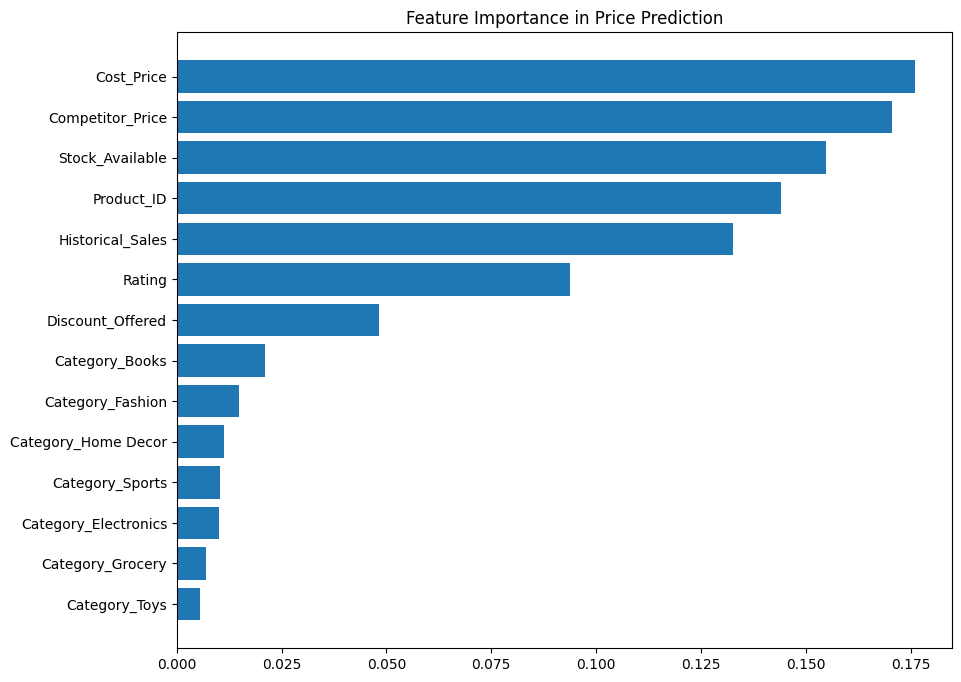

In [14]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check feature importance
feature_importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Feature Importance in Price Prediction')
plt.show()


In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


RMSE: 170.34001228160844
MAE: 145.57916500000002
R² Score: 0.06274149235883641


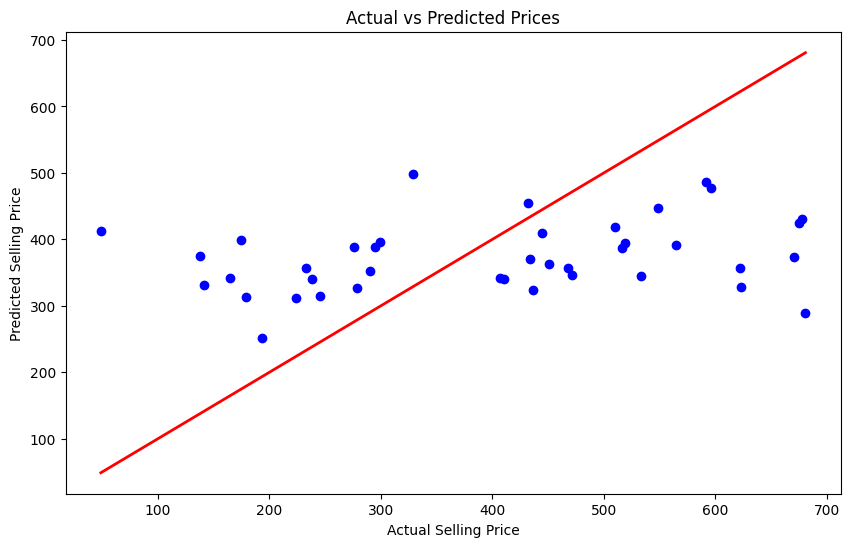

In [16]:
# Plot Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


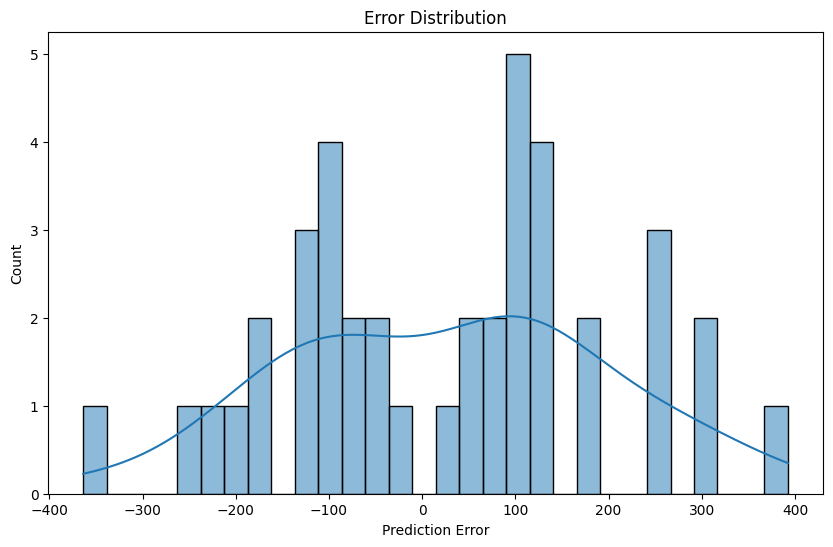

In [17]:
# Plot the error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.show()


In [18]:
import joblib

# Save the model as a .pkl file
joblib.dump(model, 'retail_price_optimization_model.pkl')


['retail_price_optimization_model.pkl']

In [21]:
# Example new product data (adjust values as necessary)
new_product = np.array([[100, 50, 0.10, 145, 4.5, 50, 1, 0, 0,0,0,0,0,0]])  # Category encoded features as well

# Predict price
predicted_price = model.predict(new_product)
print(f"Predicted Price for the new product: {predicted_price[0]}")


Predicted Price for the new product: 362.08869999999973


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
